In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df =pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
selected_columns = ['Model', 'Year', 'Make', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [5]:
data = df[selected_columns]

In [6]:
#write the columns names in small letter and replace spaces with under score
data.columns=data.columns.str.lower().str.replace(' ','_')

In [7]:
data.dtypes

model                 object
year                   int64
make                  object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [8]:
strings =list(data.dtypes[data.dtypes=='object'].index)
strings

['model', 'make', 'transmission_type', 'vehicle_style']

In [9]:
for col in strings:
    data[col] = data[col].str.lower().str.replace(' ','_')

In [10]:
data.head()

,model,year,make,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,1_series_m,2011,bmw,335.0,6.0,manual,coupe,26,19,46135
1,1_series,2011,bmw,300.0,6.0,manual,convertible,28,19,40650
2,1_series,2011,bmw,300.0,6.0,manual,coupe,28,20,36350
3,1_series,2011,bmw,230.0,6.0,manual,coupe,28,18,29450
4,1_series,2011,bmw,230.0,6.0,manual,convertible,28,18,34500


In [11]:
data.isnull().sum()

model                 0
year                  0
make                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [12]:
data.fillna(0,inplace=True)
data.rename(columns={'msrp': 'price'}, inplace =True)

In [13]:
data.isnull().sum()

model                0
year                 0
make                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [14]:
mean_price = data['price'].mean()

In [15]:
data['above_average'] = (data['price']>mean_price).astype(int)

In [16]:
data.drop(columns=['price'], inplace=True)

In [17]:
data.head()

,model,year,make,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,1_series_m,2011,bmw,335.0,6.0,manual,coupe,26,19,1
1,1_series,2011,bmw,300.0,6.0,manual,convertible,28,19,1
2,1_series,2011,bmw,300.0,6.0,manual,coupe,28,20,0
3,1_series,2011,bmw,230.0,6.0,manual,coupe,28,18,0
4,1_series,2011,bmw,230.0,6.0,manual,convertible,28,18,0


# Setting up validation Frame work

In [18]:
# perfom train/validation/test using sklearn
from sklearn.model_selection import train_test_split

In [19]:
# divide the data into train,validation,test
df_full_train, df_test =train_test_split(data, test_size = 0.2, random_state=1 )

In [20]:
len(df_full_train), len(df_test)

(9531, 2383)

In [21]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [24]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [26]:
numerical = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [27]:
auc_scores = {}

for col in df_train[numerical]:
    auc = roc_auc_score(y_train, df_train[col])
    
    if auc <0.5:
        inverted_col = -df_train[col]
        inverted_auc = roc_auc_score(y_train, inverted_col)
        auc_scores[col] = inverted_auc
    else:
        auc_scores[col] = auc

In [28]:
highest_auc_variable = max(auc_scores, key=auc_scores.get)
highest_auc_variable 

'engine_hp'

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [30]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


# One hot encoding

In [31]:
# use one hot encoding for categorical variables
from sklearn.feature_extraction import DictVectorizer

In [32]:
train_dicts = df_train.to_dict(orient='records')

In [33]:
dv = DictVectorizer(sparse=False)

In [34]:
X_train = dv.fit_transform(train_dicts)

In [35]:
val_dicts = df_val.to_dict(orient='records')

In [36]:
X_val = dv.transform(val_dicts)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [39]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [40]:
model.intercept_[0]

-0.1665599311254571

In [41]:
# this is our w(weight)
model.coef_[0].round(3)

array([ 1.500e-02, -1.600e-01,  3.600e-02,  6.800e-02,  8.220e-01,
        7.640e-01,  3.770e-01,  2.373e+00,  1.000e-01,  1.939e+00,
        0.000e+00, -6.040e-01,  2.256e+00, -1.432e+00, -8.560e-01,
       -2.832e+00,  4.590e-01, -2.580e-01, -1.522e+00,  1.850e-01,
       -8.200e-01, -1.268e+00,  2.000e-03, -2.186e+00,  5.600e-02,
       -1.438e+00,  4.000e-03,  1.842e+00,  1.301e+00,  1.389e+00,
        2.949e+00,  7.790e-01,  2.000e-03, -1.194e+00,  0.000e+00,
        6.930e-01, -1.208e+00, -1.106e+00, -9.620e-01, -1.260e-01,
       -2.278e+00,  1.392e+00,  7.030e-01,  8.120e-01, -1.510e-01,
        9.700e-02, -1.722e+00, -1.323e+00,  2.127e+00, -7.570e-01,
       -6.220e-01,  1.076e+00, -7.800e-02, -1.400e-02, -9.000e-03,
       -3.300e-01,  6.500e-02, -1.000e-03, -5.350e-01, -2.000e-03,
       -4.000e-03, -2.000e-03, -8.650e-01, -8.400e-02,  2.650e-01,
       -2.930e-01, -9.000e-02, -1.290e-01, -1.190e-01, -0.000e+00,
       -6.000e-03, -8.720e-01,  3.580e-01,  3.690e-01, -3.320e

In [42]:
# hard prediction predict 0 and 1
model.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0])

In [43]:
# soft probability predict likelyhood of churning
model.predict_proba(X_train)

array([[4.29459492e-01, 5.70540508e-01],
       [8.84225641e-01, 1.15774359e-01],
       [9.29111864e-01, 7.08881362e-02],
       ...,
       [9.99586710e-01, 4.13289871e-04],
       [9.74216705e-01, 2.57832947e-02],
       [8.85716543e-01, 1.14283457e-01]])

In [44]:
# using it on valitaton dataset
y_pred =model.predict_proba(X_val)[:,1]

In [45]:
above_average_decision = (y_pred >= 0.5)

In [46]:
# check the accuracy of the model
accuracy = (y_val == above_average_decision).mean()

In [47]:
auc_score = roc_auc_score(y_val, y_pred)

In [48]:
print('AUC on validation dataset:', round(auc_score,3))

AUC on validation dataset: 0.98


In [49]:
print('AUC on validation dataset:', round(auc_score,4))

AUC on validation dataset: 0.9795


# Precision and Recall

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [51]:
len(y_val)

2383

In [52]:
(y_val == above_average_decision).mean()


0.9353755770037767

In [53]:
(y_val == above_average_decision).sum()

2229

In [54]:
2229/2383

0.9353755770037767

In [55]:
actual_positive=(y_val==1)

actual_negative=(y_val==0)

In [56]:
t=0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred < t)

In [57]:
tp = (actual_positive & predict_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [58]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [59]:
tp, tn, fp, fn

(571, 1658, 71, 83)

In [60]:
p = tp / (tp + fp)
p

0.8894080996884736

In [61]:
r = tp / (tp + fn)
r

0.8730886850152905

In [62]:
scores =  []
thresholds = np.arange(0.0, 1.0 , 0.01)
for t in thresholds:
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred < t)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    r = tp / (tp + fn)
    p = tp / (tp + fp)
    
    f1 = 2 * (p*r)/(p+r) 
    
    scores.append((t, tp, tn, fp, fn,p,r,f1))

In [63]:
columns = ['threshold', 'tp', 'tn', 'fp', 'fn', 'r', 'p','f1']
df_scores =pd.DataFrame(scores, columns=columns)

In [64]:
df_scores

,threshold,tp,tn,fp,fn,r,p,f1
0,0.00,654,0,1729,0,0.274444,1.000000,0.430688
1,0.01,652,948,781,2,0.454990,0.996942,0.624820
2,0.02,651,1086,643,3,0.503091,0.995413,0.668378
3,0.03,651,1168,561,3,0.537129,0.995413,0.697749
4,0.04,650,1232,497,4,0.566696,0.993884,0.721821
...,...,...,...,...,...,...,...,...
95,0.95,285,1728,1,369,0.996503,0.435780,0.606383
96,0.96,270,1728,1,384,0.996310,0.412844,0.583784
97,0.97,251,1728,1,403,0.996032,0.383792,0.554084
98,0.98,233,1729,0,421,1.000000,0.356269,0.525366


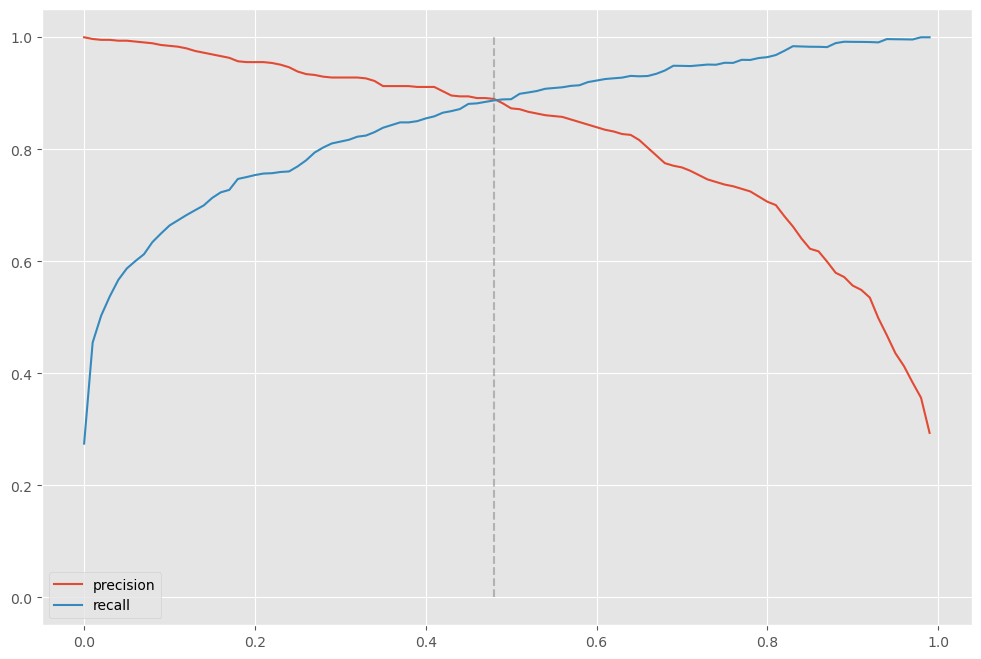

In [65]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.48, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [66]:
max_value = df_scores['f1'].max()
max_value 

0.8885496183206106

In [67]:
max_value_index = df_scores['f1'].idxmax()
max_value_index 


48

In [68]:
df_scores.loc[48]

threshold       0.480000
tp            582.000000
tn           1655.000000
fp             74.000000
fn             72.000000
r               0.887195
p               0.889908
f1              0.888550
Name: 48, dtype: float64

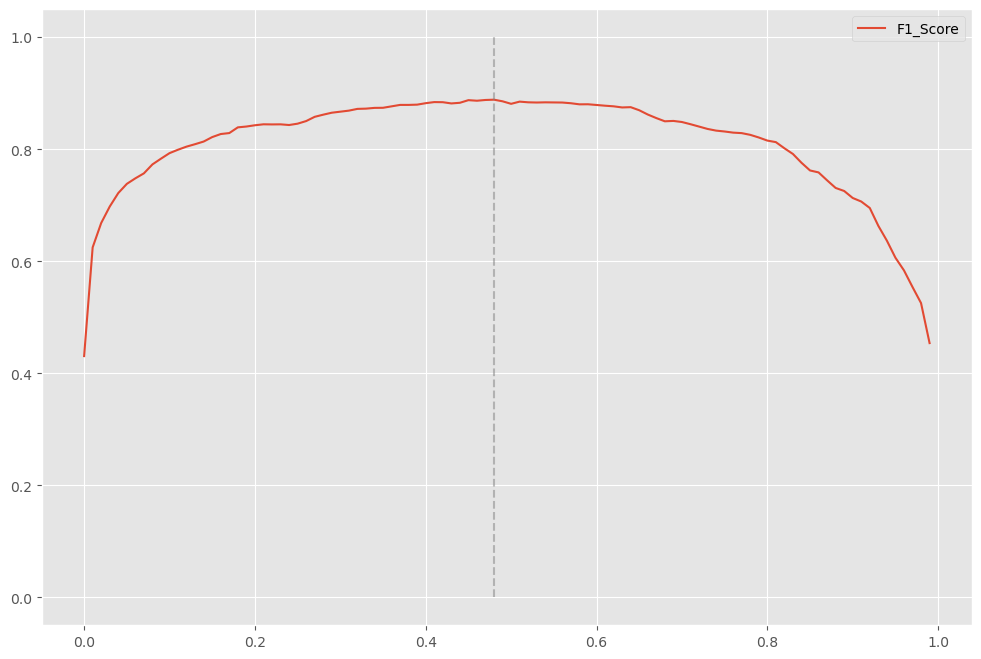

In [75]:
plt.plot(df_scores.threshold, df_scores.f1, label='F1_Score')

plt.vlines(0.48, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

# Kfold

In [70]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer

# Assuming df_full_train is your training dataset with features and target

# Define the KFold object with 5 splits, shuffling the data, and setting a random seed
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize a list to store AUC scores for each fold
auc_scores = []

# Initialize DictVectorizer
vectorizer = DictVectorizer()

# Iterate over different folds of df_full_train
for train_index, val_index in kf.split(df_full_train):
    # Split the data into train and validation sets based on the fold indices
    train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    
    # Separate the features (X) and the target (y) variables for train and validation
    X_train, y_train = train_data.drop(columns=['above_average']), train_data['above_average']
    X_val, y_val = val_data.drop(columns=['above_average']), val_data['above_average']
    
    # Convert feature dataframes to dictionaries and then use DictVectorizer
    X_train_dict = X_train.to_dict(orient='records')
    X_val_dict = X_val.to_dict(orient='records')
    
    X_train_encoded = vectorizer.fit_transform(X_train_dict)
    X_val_encoded = vectorizer.transform(X_val_dict)
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)
    
    # Predict probabilities on the validation set
    y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]
    
    # Calculate the AUC score and append it to the list
    auc_score = roc_auc_score(y_val, y_pred_proba)
    auc_scores.append(auc_score)

# Calculate and print the mean AUC score across all folds
mean_auc = sum(auc_scores) / len(auc_scores)
print("Mean AUC:", mean_auc)


Mean AUC: 0.9790849208748122


In [71]:
auc_scores

[0.9784808734152848,
 0.977489884329507,
 0.9773827449668173,
 0.9772656293569796,
 0.9848054723054723]

In [72]:
std_deviation = np.std(auc_scores)
std_deviation

0.0028927823296495785

In [73]:

# Define the C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize KFold with the same parameters as previously
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize lists to store mean and std scores
mean_scores = []
std_scores = []

# Iterate over different C values
for C in C_values:
    # Initialize a list to store AUC scores for each fold
    auc_scores = []
    
    # Iterate over different folds of df_full_train
    for train_index, val_index in kf.split(df_full_train):
        # Split the data into train and validation sets based on the fold indices
        train_data, val_data = df_full_train.iloc[train_index], df_full_train.iloc[val_index]

        # Separate the features (X) and the target (y) variables for train and validation
        X_train, y_train = train_data.drop(columns=['above_average']), train_data['above_average']
        X_val, y_val = val_data.drop(columns=['above_average']), val_data['above_average']

        # Convert feature dataframes to dictionaries and then use DictVectorizer
        X_train_dict = X_train.to_dict(orient='records')
        X_val_dict = X_val.to_dict(orient='records')

        X_train_encoded = vectorizer.fit_transform(X_train_dict)
        X_val_encoded = vectorizer.transform(X_val_dict)

        # Initialize and train the Logistic Regression model with the current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        # Predict probabilities on the validation set
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

        # Calculate the AUC score and append it to the list
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)
    
    # Calculate the mean and standard deviation of AUC scores for the current C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # Append the mean and std scores to the respective lists (rounded to 3 decimal digits)
    mean_scores.append(round(mean_auc, 3))
    std_scores.append(round(std_auc, 3))

# Print the results for each C value
for i, C in enumerate(C_values):
    print(f"C = {C}: Mean AUC = {mean_scores[i]}, Std = {std_scores[i]}")


C = 0.01: Mean AUC = 0.952, Std = 0.002
C = 0.1: Mean AUC = 0.972, Std = 0.002
C = 0.5: Mean AUC = 0.979, Std = 0.002
C = 10: Mean AUC = 0.981, Std = 0.002
